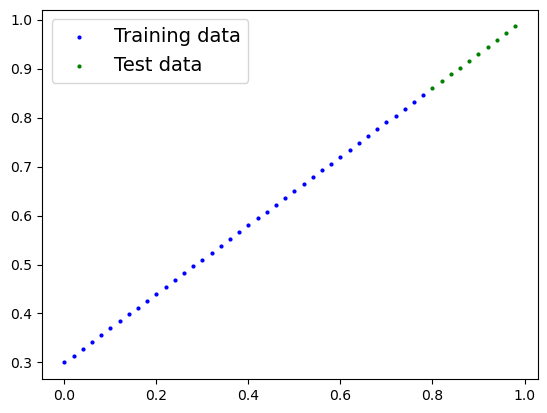

In [14]:
import torch
import matplotlib.pyplot as plt
from torch import nn

def plot_predictions( train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Prediction')

    plt.legend(prop = {'size': 14})
    

weight = 0.7
bias = 0.3

start  = 0 
end = 1
step = 0.02 
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

#X[:10], y[:10]

#Creating train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

plot_predictions()



In [23]:
#Build model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights* x + self.bias

In [24]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
# making some predictions 

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

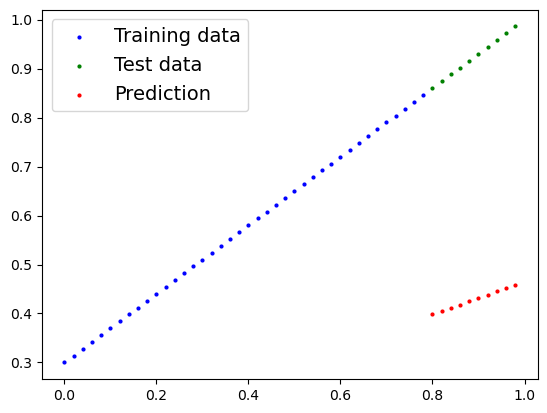

In [26]:
plot_predictions(predictions= y_preds)

In [28]:
#Train model

#loss function
loss_fn = nn.L1Loss()

#optimezer

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr learning rate




In [47]:
#training and testing loop
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_0.train()
    #forward pass
    y_pred = model_0(X_train)
    
    #calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f'Loss {loss}')

    #optimezer zero grad
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #step the optimizer
    optimizer.step()

    

    
    model_0.eval()

model_0.state_dict()

Loss 0.02376994863152504
Loss 0.02342480979859829
Loss 0.023080935701727867
Loss 0.022739607840776443
Loss 0.022391926497220993
Loss 0.022054409608244896
Loss 0.02170540764927864
Loss 0.021366719156503677
Loss 0.021020207554101944
Loss 0.020677709951996803
Loss 0.02033500373363495
Loss 0.01998869702219963
Loss 0.019649803638458252
Loss 0.019300809130072594
Loss 0.018963487818837166
Loss 0.01861560344696045
Loss 0.018274478614330292
Loss 0.017930403351783752
Loss 0.01758546568453312
Loss 0.017245199531316757
Loss 0.016896454617381096
Loss 0.01656000316143036
Loss 0.016210997477173805
Loss 0.01587124727666378
Loss 0.015525798313319683
Loss 0.015182236209511757
Loss 0.014840595424175262
Loss 0.01449323259294033
Loss 0.014155393466353416
Loss 0.013806397095322609
Loss 0.013468016870319843
Loss 0.013121193274855614
Loss 0.01277900766581297
Loss 0.012435992248356342
Loss 0.01208999752998352
Loss 0.011750795878469944
Loss 0.011401787400245667
Loss 0.011064787395298481
Loss 0.01071658916771411

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [48]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [49]:
with torch.inference_mode():
    y_pred_after_hundred = model_0(X_test)

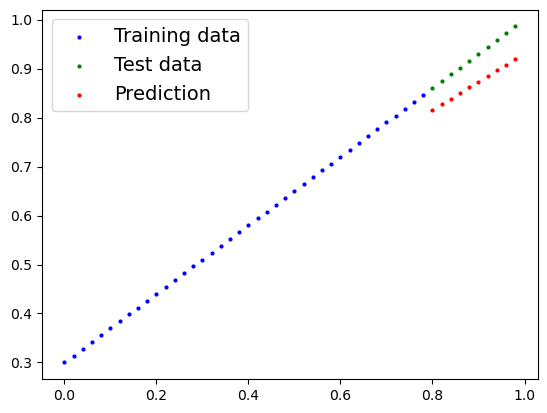

In [46]:
plot_predictions(predictions=y_pred_after_hundred)

In [4]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9
